## Settings

In [1]:
reviews_path = 'C:\\Data\\UCL\\@MSc Project - Data and sources\\reviews.csv'

In [2]:
from os.path import join
from datetime import datetime
from IPython.core.display import HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical_align: middle;
}
</style>
""")

## Load the data

In [4]:
reviews = pd.read_csv(reviews_path)

min_date = datetime.strptime('2018-7-1', '%Y-%m-%d')
max_date = datetime.strptime('2020-6-30', '%Y-%m-%d')
reviews['Date'] = pd.to_datetime(reviews.Date)

reviews = reviews[(reviews.Date >= min_date) & (reviews.Date <= max_date)]

In [5]:
reviews.columns

Index(['id', 'Company_id', 'ReviewTitle', 'Rating', 'JobTitle',
       'EmployeeRelationship', 'Contract', 'Pros', 'Cons', 'Year', 'Month',
       'Day', 'Company', 'Sector', 'ListedOn', 'Review', 'ReviewLentgth',
       'Date', 'Year-Month'],
      dtype='object')

## ==Functions==

In [6]:
# helper quantile/quartile functions

def Q1(x):
    return x.quantile(.25)

def Q3(x):
    return x.quantile(.75)

def q5(x):
    return x.quantile(.05)

def q10(x):
    return x.quantile(.1)

def q90(x):
    return x.quantile(.9)

def q95(x):
    return x.quantile(.95)

In [7]:
def dispersion(reviews, group_by, agg_list):
    return (
        reviews
        .groupby(group_by)
        .Rating
        .agg(agg_list)
        .round(3)
        .reset_index()
    )

# 1. Sentiment over time 
 <hr>
across whole company world

In [8]:
over_time = dispersion(reviews, 'Year-Month', ['count', 'mean', 'std'])
over_time['Date'] = over_time['Year-Month'].apply(lambda x:  x[5:7] + '/' + x[2:4])

In [51]:
over_time

,Year-Month,count,mean,std,up,down,Date,3M
0,2018-07-01,16467,3.552,1.230,4.782,2.322,07/18,NaN
1,2018-08-01,18629,3.600,1.234,4.834,2.366,08/18,NaN
2,2018-09-01,16154,3.582,1.229,4.811,2.353,09/18,3.578000
3,2018-10-01,16061,3.592,1.218,4.810,2.374,10/18,3.591333
4,2018-11-01,13935,3.526,1.236,4.762,2.290,11/18,3.566667
5,2018-12-01,11574,3.524,1.258,4.782,2.266,12/18,3.547333
6,2019-01-01,16529,3.547,1.236,4.783,2.311,01/19,3.532333
7,2019-02-01,15492,3.522,1.238,4.760,2.284,02/19,3.531000
8,2019-03-01,17480,3.536,1.234,4.770,2.302,03/19,3.535000
9,2019-04-01,16819,3.582,1.224,4.806,2.358,04/19,3.546667


In [37]:
over_time['Date'] = over_time['Year-Month'].apply(lambda x:  x[5:7] + '/' + x[2:4])

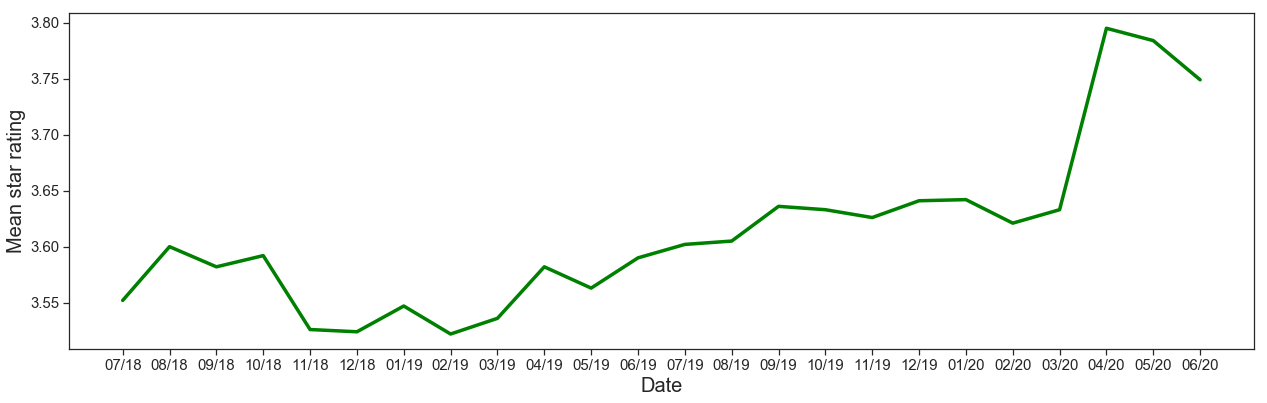

In [53]:
plt.figure(figsize=(18,6))

line = sns.lineplot(
    x='Date',
    y='mean',
    data = over_time,
    sort=False,
    color='green',
    linewidth=3.5
)

line.set_xlabel('Date', fontsize=20)
line.set_ylabel('Mean star rating', fontsize=20)
line.tick_params(labelsize=15)

plt.tight_layout()

plt.savefig('C:\\Data\\UCL\\@MSc Project - Data and sources\\Images\\Sentiment_time.png')

## 2. Sentiment over time and across former and current employees

In [60]:
over_time_current = (
    reviews
    .groupby(['Year-Month', 'EmployeeRelationship'])
    .Rating
    .agg(['count', 'mean', 'std'])
    .round(3)
    .reset_index()
)
over_time_current = over_time_current[over_time_current.EmployeeRelationship.isin(['Current Employee', 'Former Employee'])]

In [55]:
over_time_current['Date'] = over_time_current['Year-Month'].apply(lambda x:  x[5:7] + '/' + x[2:4])

In [61]:
plt.figure(figsize=(18,6))

line = sns.lineplot(
    x='Date',
    y='mean',
    hue='EmployeeRelationship',
    data = over_time,
    sort=False,
    color='green',
    linewidth=3.5
)

line.set_xlabel('Date', fontsize=20)
line.set_ylabel('Mean star rating', fontsize=20)
line.tick_params(labelsize=15)

plt.tight_layout()

ValueError: Could not interpret input 'EmployeeRelationship'

<Figure size 1296x432 with 0 Axes>

In [59]:
over_time_current

,Year-Month,EmployeeRelationship,count,mean,std,Date
0,2018-07-01,Current Employee,9307,3.741,1.154,07/18
1,2018-07-01,Former Employee,5636,3.245,1.290,07/18
2,2018-07-01,Not specified,1524,3.533,1.228,07/18
3,2018-08-01,Current Employee,10403,3.799,1.153,08/18
4,2018-08-01,Former Employee,6401,3.277,1.289,08/18
...,...,...,...,...,...,...
67,2020-05-01,Former Employee,6618,3.501,1.256,05/20
68,2020-05-01,Not specified,51,3.137,1.296,05/20
69,2020-06-01,Current Employee,9056,3.962,1.123,06/20
70,2020-06-01,Former Employee,7370,3.488,1.245,06/20
